<a href="https://colab.research.google.com/github/ritikakhandelwal-17/Exploratory_Project-powertheftdetection/blob/main/model_selection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
data=pd.read_csv('/content/drive/MyDrive/explo_final_data(km).csv')
X=data.drop(['label','day_name'],1)
y=data['label']
#scaling of data
scaler = preprocessing.MinMaxScaler()
data_scaled = scaler.fit_transform(X[['energy','temp_avg']])
data_scaled=pd.DataFrame(data_scaled,columns=['energy','temp_avg'])
X['temp_avg']=data_scaled['temp_avg']
X['energy']=data_scaled['energy']
#splitting in training and testing data
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.32, random_state=0)

In [2]:
X

,energy,perciptype,month,hol+sun,season,temp_avg,uvIndex
0,0.026919,0,11,0,2,0.330438,1.0
1,0.026919,0,11,0,2,0.330438,1.0
2,0.026919,0,11,0,2,0.330438,1.0
3,0.026919,0,11,0,2,0.330438,1.0
4,0.026919,0,11,0,2,0.330438,1.0
...,...,...,...,...,...,...,...
5570046,0.000331,0,2,0,0,0.267788,1.0
5570047,0.000277,0,2,0,0,0.267788,1.0
5570048,0.000388,0,2,0,0,0.267788,1.0
5570049,0.000183,0,2,0,0,0.267788,1.0


In [3]:
accuracy=[]
mo=['random forest classfier','random forest regressor','decesion tree']

random forest model accuracy(in %): 71.90303952442105


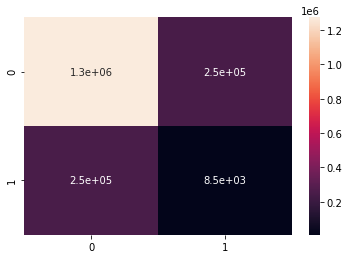

In [4]:
#random forest classifier
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators = 17)  
clf.fit(X_train, y_train)
  
# performing predictions on the test dataset
y_pred = clf.predict(X_test)
cm = confusion_matrix(y_test, y_pred)  


# comparing actual response values (y_test) with predicted response values (y_pred)
from sklearn import metrics
print("random forest model accuracy(in %):", metrics.accuracy_score(y_test, y_pred)*100)
accuracy.append(metrics.accuracy_score(y_test, y_pred)*100)

sns.heatmap(cm,annot=True)

random forest model accuracy(in %): 79.96338679444821


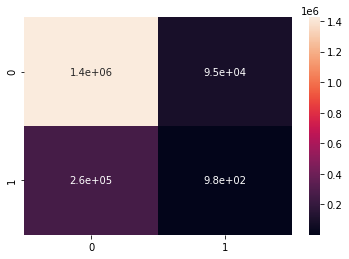

In [5]:
from sklearn.ensemble import RandomForestRegressor

regressor = RandomForestRegressor(n_estimators=17, random_state=0)
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)

for i in range(len(y_pred)):
    if y_pred[i]>=0.7:
        y_pred[i]=1
    elif y_pred[i]<0.7:
        y_pred[i]=0
   
cm = confusion_matrix(y_test, y_pred)  


# comparing actual response values (y_test) with predicted response values (y_pred)
from sklearn import metrics
print("random forest model accuracy(in %):", metrics.accuracy_score(y_test, y_pred)*100)
accuracy.append(metrics.accuracy_score(y_test, y_pred)*100)

sns.heatmap(cm,annot=True)

decesion tree model accuracy(in %): 72.7810607730963


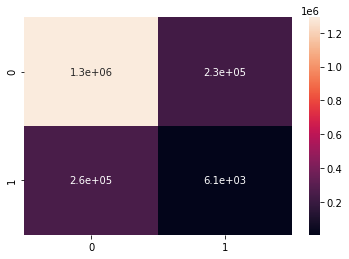

In [6]:
#decesion tree
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()

# fit the model with the training data
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
cm = confusion_matrix(y_test, y_pred)  

# comparing actual response values (y_test) with predicted response values (y_pred)
from sklearn import metrics
print("decesion tree model accuracy(in %):", metrics.accuracy_score(y_test, y_pred)*100)
accuracy.append(metrics.accuracy_score(y_test, y_pred)*100)

sns.heatmap(cm,annot=True)

<BarContainer object of 3 artists>

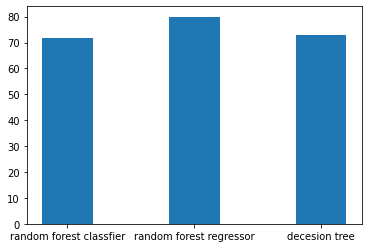

In [7]:
plt.bar(mo,accuracy,width=0.4)


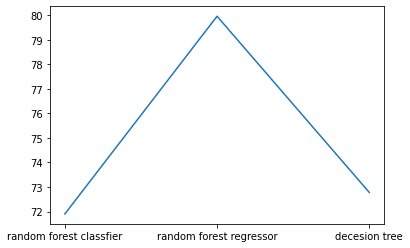

In [8]:
plt.plot(mo,accuracy)
